<a href="https://colab.research.google.com/github/GarimaGarima/TensorFlow/blob/master/Mislabelled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random
import seaborn as sns


#downlaod MNIST data
(x_train, y_train),(x_test, y_test) = mnist.load_data()


Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [0]:
# method to divide the training data in 2 parts one with good and bad
# takes bad number of labels and input of training data 

def divide_data(bad, train_images, train_labels):
  bad_images = train_images[:bad] # bad image data
  to_bad_labels = train_labels[:bad] # dataset to be converted to bad labels
  bad_labels = [np.mod(x+1,10) for x in to_bad_labels]  # increasing all lables value by 1

  good_images = train_images[bad:] # remaining data set is good images
  good_labels = train_labels[bad:] # remaining data set is good labels
  return good_images, good_labels, bad_images, bad_labels # return good and bad set of data

In [0]:
# create model 

def create_model(input_size, neu1, neu2, output_size):
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(neu1))
  model.add(Activation("relu"))
  model.add(Dropout(0.45))
  model.add(Dense(neu2))
  model.add(Activation("relu"))
  model.add(Dropout(0.45))
  model.add(Dense(output_size))
  model.add(Activation("softmax"))
  model.compile(loss = "sparse_categorical_crossentropy", optimizer= "adam", metrics=["accuracy"])
  return model 


In [0]:
train_accuracy = []
test_accuracy = []

#number of labels
num_labels = len(np.unique(y_train))

# find the number of neurons in input layer 
image_size = x_train.shape[1]
input_size = image_size * image_size

# normalize the data
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)


10000
50000





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 11s 186us/step - loss: 1.0266 - acc: 0.6792
Epoch 2/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.7251 - acc: 0.7664
Epoch 3/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.6617 - acc: 0.7815
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.6264 - acc: 0.7912
Epoch 5/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.6091 - acc: 0.7951
Epoch 6/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.5897 - acc: 0.7985
Epoch 7/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.5760 - acc: 0.8016
Epoch 8/10
60000/60000 [==============================] - 2s 41

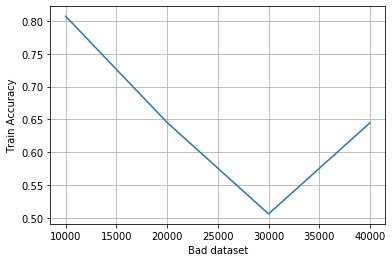

In [0]:
sets = [10000,20000,30000,40000]
for x in sets: 
  mislabelled = []
  test_loss = 0
  test_acc = 0
  training_results = []
  good_i , good_l , bad_i, bad_l = divide_data(x, x_train, y_train)
  mislabelled = np.concatenate((bad_l,good_l)) 
  print(len(bad_l))
  print(len(good_l))

  fullset_model = create_model(input_size, 256, 128, num_labels) 
  # training with mislabelled data
  training_results = fullset_model.fit(x_train, mislabelled, epochs=10, shuffle= True, batch_size = 128)
  train_accuracy.append(training_results.history['acc'][9]) 
 
  # testing the model.
  test_loss, test_acc = fullset_model.evaluate(x_test,y_test)
  test_accuracy.append(test_acc)


print(train_accuracy)
print(test_accuracy)

plt.xlabel('Bad dataset')
plt.ylabel('Train Accuracy')
plt.plot(sets, train_accuracy)
plt.grid(True)


Epoch 1/10
60000/60000 [==============================] - 3s 51us/step - loss: 1.0323 - acc: 0.6789
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.7307 - acc: 0.7630
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.6659 - acc: 0.7811
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.6304 - acc: 0.7897
Epoch 5/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.6071 - acc: 0.7947
Epoch 6/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.5932 - acc: 0.7984
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.5783 - acc: 0.8023
Epoch 8/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.5683 - acc: 0.8036
Epoch 9/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.5592 - acc: 0.8067
Epoch 10/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.5543 - acc: 0.8073

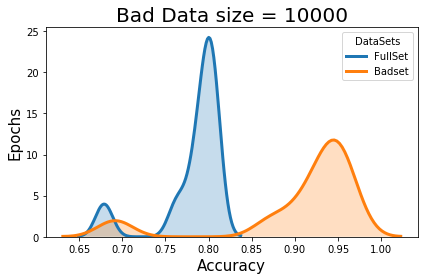

Epoch 1/10
60000/60000 [==============================] - 3s 53us/step - loss: 1.2172 - acc: 0.5151
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.9057 - acc: 0.5953
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.8438 - acc: 0.6157
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.8055 - acc: 0.6273
Epoch 5/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.7856 - acc: 0.6309
Epoch 6/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.7664 - acc: 0.6363
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.7566 - acc: 0.6391
Epoch 8/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.7468 - acc: 0.6413
Epoch 9/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.7384 - acc: 0.6423
Epoch 10/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.7312 - acc: 0.6449

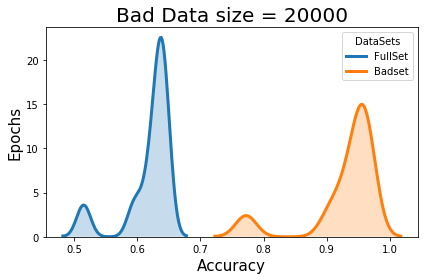

Epoch 1/10
60000/60000 [==============================] - 3s 54us/step - loss: 1.2686 - acc: 0.4224
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.9604 - acc: 0.4737
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.8950 - acc: 0.4819
Epoch 4/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.8606 - acc: 0.4889
Epoch 5/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.8420 - acc: 0.4907
Epoch 6/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.8216 - acc: 0.4995
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.8128 - acc: 0.4989
Epoch 8/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.8032 - acc: 0.5022
Epoch 9/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.7940 - acc: 0.5043
Epoch 10/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.7886 - acc: 0.5077

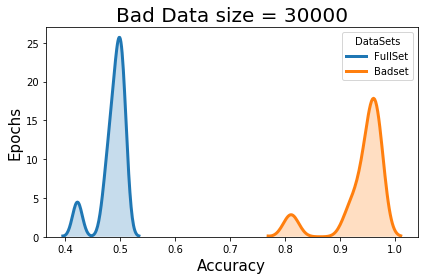

Epoch 1/10
60000/60000 [==============================] - 3s 57us/step - loss: 1.2139 - acc: 0.5098
Epoch 2/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.9038 - acc: 0.5937
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.8406 - acc: 0.6147
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.8062 - acc: 0.6243
Epoch 5/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.7845 - acc: 0.6305
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.7707 - acc: 0.6351
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.7580 - acc: 0.6385
Epoch 8/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.7471 - acc: 0.6417
Epoch 9/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.7413 - acc: 0.6423
Epoch 10/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.7316 - acc: 0.6456

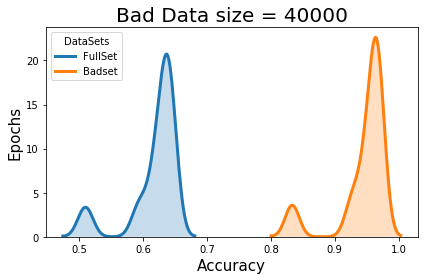

In [0]:
for i, x in enumerate([10000,20000,30000,40000]):
  # initializing
  mislabelled = []
  test_loss = 0
  test_acc = 0
  training_results = []

  #creating different good and bad dataset
  good_i , good_l , bad_i, bad_l = divide_data(x, x_train, y_train)
  mislabelled = np.concatenate((bad_l,good_l)) 
  bad_l = np.array(bad_l)
  # print(bad_l[0])
  # print(good_l[0])
  # print(mislabelled.shape)

 
  # training with complete data inclusing mislabelled data
  fullset_model = create_model(input_size, 256, 128, num_labels) 
  FullSet = fullset_model.fit(x_train, mislabelled, epochs=10, shuffle= True, batch_size = 128)
  
  # training modwl with only bad data
  badset_model = create_model(input_size, 256, 128, num_labels)
  BadSet = badset_model.fit(bad_i, bad_l, epochs = 10, shuffle = True, batch_size = 64)

  vars = { "FullSet" : FullSet , "Badset" : BadSet}

  for name,v in vars.items():
    sns.distplot(v.history["acc"], hist = False, kde = True,
                   kde_kws = {'shade': True, 'linewidth': 3},
                   label = name )
  
 
  plt.legend(prop={'size': 10}, title = 'DataSets')
  plt.title('Bad Data size = %d' % x, size = 20)
  plt.xlabel('Accuracy', size = 15)
  plt.ylabel('Epochs', size= 15)
  plt.tight_layout()
  plt.show()